In [59]:
from IPython.display import HTML
from IPython.display import display

# Tomado de https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=false; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

Para mostrar/ocultar código presione <a href="javascript:code_toggle()">aquí</a>.''')


###########################################################################################################################


from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt


def CalculoVelocidad (arregloTiempo, velInicial, aceleración):
    velocidad = velInicial + aceleración * arregloTiempo
    return velocidad

def CalculoPosición (posInicial, arregloTiempo, velInicial, aceleración):
    posición = posInicial + velInicial * arregloTiempo + 1/2 * aceleración * arregloTiempo ** 2
    return posición


def Gráficas ():
   
    display(tag)    
   

    def GraficoInteractivo (velInicialx, velInicialy, velInicialz,
                                     posInicialx, posInicialy, posInicialz,
                                     tiempo):

      arregloTiempo = np.linspace (0, tiempo, 20)

      velocidadx = CalculoVelocidad (arregloTiempo, velInicialx, 0)
      velocidady = CalculoVelocidad (arregloTiempo, velInicialy, 0)
      velocidadz = CalculoVelocidad (arregloTiempo, velInicialz, -9.81)
        
      posiciónx = CalculoPosición (posInicialx, arregloTiempo, velInicialx, 0)
      posicióny = CalculoPosición (posInicialy, arregloTiempo, velInicialy, 0)
      posiciónz = CalculoPosición (posInicialz, arregloTiempo, velInicialz, -9.81)
    
      aceleraciónx = np.zeros (20)
      aceleracióny = np.zeros (20)
      aceleraciónz = np.ones (20) * -9.81

      fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots (2, 3, figsize = (20,21), dpi= 120)

      ax1.set_xlabel('Tiempo $(s)$', fontsize=16)
      ax1.set_ylabel('Posición $x$ $(m)$', fontsize=16)
      ax1.plot (arregloTiempo, posiciónx)
      ax1.set_xlim([0,3]) 
      ax1.set_ylim([-20,20])      
      ax1.grid ()
    
      ax2.set_xlabel('Tiempo $(s)$', fontsize=16)
      ax2.set_ylabel('Posición $y$ $(m)$', fontsize=16)
      ax2.plot (arregloTiempo, posicióny)
      ax2.set_xlim([0,3]) 
      ax2.set_ylim([-20,20])      
      ax2.grid ()
    
      ax3.set_xlabel('Tiempo $(s)$', fontsize=16)
      ax3.set_ylabel('Posición $z$ $(m)$', fontsize=16)
      ax3.plot (arregloTiempo, posiciónz)
      ax3.set_xlim([0,3]) 
      ax3.set_ylim([-30,10])      
      ax3.grid ()
        
        
        
      ax4.set_xlabel('Tiempo $(s)$', fontsize=16)
      ax4.set_ylabel('Velocidad $x$ $(m/s)$', fontsize=16)
      ax4.plot (arregloTiempo, velocidadx) 
      ax4.set_xlim([0,3])
      ax4.set_ylim([-10,10]) 
      ax4.grid ()
        
      ax5.set_xlabel('Tiempo $(s)$', fontsize=16)
      ax5.set_ylabel('Velocidad $y$ $(m/s)$', fontsize=16)
      ax5.plot (arregloTiempo, velocidady) 
      ax5.set_xlim([0,3])
      ax5.set_ylim([-10,10]) 
      ax5.grid ()
        
      ax6.set_xlabel('Tiempo $(s)$', fontsize=16)
      ax6.set_ylabel('Velocidad $z$ $(m/s)$', fontsize=16)
      ax6.plot (arregloTiempo, velocidadz) 
      ax6.set_xlim([0,3])
      ax6.set_ylim([-30,10]) 
      ax6.grid ()    

    
      plt.show()

      return 
    
    velEtiquetax = widgets.Label (value="Velocidad Inicial $x$ $(m/s)$:")
    velSliderx = widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    posEtiquetax = widgets.Label (value="Posición Inicial $x$ $(m)$:")
    posSliderx = widgets.IntSlider(min=-5.0, max=5.0, step=1.0, value=0.0)
    
    cajax = widgets.HBox([velEtiquetax, velSliderx, posEtiquetax, posSliderx])
    
    
    velEtiquetay = widgets.Label (value="Velocidad Inicial $y$ $(m/s)$:")
    velSlidery= widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    posEtiquetay = widgets.Label (value="Posición Inicial $y$ $(m)$:")
    posSlidery = widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    cajay = widgets.HBox([velEtiquetay, velSlidery, posEtiquetay, posSlidery])
    
    
    velEtiquetaz = widgets.Label (value="Velocidad Inicial $z$ $(m/s)$:")
    velSliderz = widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    posEtiquetaz = widgets.Label (value="Posición Inicial $z$ $(m)$:")
    posSliderz = widgets.IntSlider(min=-5.0, max=5.0, step=1.0, value=0.0)
    
    cajaz = widgets.HBox([velEtiquetaz, velSliderz, posEtiquetaz, posSliderz])

    play = widgets.Play(value=0, min=0, max=3, step=1, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.FloatSlider(min=0, max=3,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivo, {'velInicialx':velSliderx,
                                                                      'velInicialy':velSlidery,
                                                                      'velInicialz':velSliderz,
                                                                      'posInicialx':posSliderx,
                                                                      'posInicialy':posSlidery,
                                                                      'posInicialz':posSliderz,
                                                                      'tiempo':tieSlider})

    display(cajax, cajay, cajaz, cajaTiempo, play, salida)
    
    
from mpl_toolkits import mplot3d    

def GraficaMovimiento ():
    display (tag)
    
    def Grafico (velInicialx, velInicialy, velInicialz,
                                     posInicialx, posInicialy, posInicialz,
                                     tiempo, vistas):
        arregloTiempo = np.linspace (0, tiempo, 20)

        posx = CalculoPosición (posInicialx, arregloTiempo, velInicialx, 0)
        posy = CalculoPosición (posInicialy, arregloTiempo, velInicialy, 0)
        posz = CalculoPosición (posInicialz, arregloTiempo, velInicialz, -9.8)
        
        vistaHorizontal = [45, 0, 90, 0]
        vistaVertical = [10, 10, 10,90]

        fig = plt.figure (figsize = (5,7), dpi= 120)
        ax = plt.axes (projection = '3d')    
        ax.set_title ("Movimiento de una partícula en 3 dimensiones")


        ax.set_xlabel ('x $(m)$')
        plt.xlim (-20, 20)
        ax.set_ylabel ('y $(m)$')
        plt.ylim (-20, 20)
        ax.set_zlabel ('z $(m)$')
        ax.set_zlim(-20,20)
        ax.plot (posx, posy, posz)
        ax.view_init (vistaVertical[vistas], vistaHorizontal[vistas])
        plt.show()
        
        return
    
    velEtiquetax = widgets.Label (value="Velocidad Inicial $x$ $(m/s)$:")
    velSliderx = widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    posEtiquetax = widgets.Label (value="Posición Inicial $x$ $(m)$:")
    posSliderx = widgets.IntSlider(min=-5.0, max=5.0, step=1.0, value=0.0)
    
    cajax = widgets.HBox([velEtiquetax, velSliderx, posEtiquetax, posSliderx])
    
    
    velEtiquetay = widgets.Label (value="Velocidad Inicial $y$ $(m/s)$:")
    velSlidery= widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    posEtiquetay = widgets.Label (value="Posición Inicial $y$ $(m)$:")
    posSlidery = widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    cajay = widgets.HBox([velEtiquetay, velSlidery, posEtiquetay, posSlidery])
    
    
    velEtiquetaz = widgets.Label (value="Velocidad Inicial $z$ $(m/s)$:")
    velSliderz = widgets.IntSlider(min=-5, max=5.0, step=1.0, value=0.0)
    
    posEtiquetaz = widgets.Label (value="Posición Inicial $z$ $(m)$:")
    posSliderz = widgets.IntSlider(min=-5.0, max=5.0, step=1.0, value=0.0)
       
    cajaz = widgets.HBox([velEtiquetaz, velSliderz, posEtiquetaz, posSliderz])

    play = widgets.Play(value=0, min=0, max=3, step=1, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.FloatSlider(min=0, max=3,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    vistas = widgets.Dropdown(options=[('Diagonal',0), ('Eje X',1), ('Eje Y',2), ("Eje Z",3)], 
                              value=0, description='Vista:', disabled=False,)
    
    salida = widgets.interactive_output(Grafico, {'velInicialx':velSliderx,
                                                                      'velInicialy':velSlidery,
                                                                      'velInicialz':velSliderz,
                                                                      'posInicialx':posSliderx,
                                                                      'posInicialy':posSlidery,
                                                                      'posInicialz':posSliderz,
                                                                      'tiempo':tieSlider,
                                                                      'vistas':vistas   })
    
    display(cajax, cajay, cajaz, cajaTiempo, play, vistas, salida)
    
    
    
def GraficaParabólico ():
    display (tag)
    
    def Grafico2D (velInicial, ángulo, alturaInicial, tiempo):
        arregloTiempo = np.linspace (0, tiempo, 100)
        
        ánguloRad = ángulo * np.pi/180
        
        velInicialx = velInicial * np.cos(ánguloRad)
        velInicialy = velInicial * np.sin(ánguloRad)

        posx = CalculoPosición (0, arregloTiempo, velInicialx, 0)
        posy = CalculoPosición (alturaInicial, arregloTiempo, velInicialy, -9.8)
        
        alturaMaxima = max (posy)
        velocidadMaxima = np.sqrt (2*9.81*alturaMaxima)/np.sin(ánguloRad)
        
        
        fig, ax = plt.subplots (dpi=120)

        ax.set_xlabel('x $(m)$')
        ax.set_ylabel('y $(m)$')
        plt.annotate("Altura Máxima = " + str(round(alturaMaxima,2)) + " $m$", (25,46))
        plt.annotate("Velocidad Máxima = " + str(round(velocidadMaxima,2)) + " $m/s$", (25,43))
        plt.xlim (0, 50)
        plt.ylim (0, 50)
        ax.plot (posx, posy)
        ax.set_title('Movimiento parabólico en dos dimensiones')

        plt.grid ()
        
        plt.show()
        
        return
    
    velEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velSlider = widgets.IntSlider(min=0, max=20, step=1.0, value=10.0)
    
    cajaVel = widgets.HBox([velEtiqueta, velSlider])
    
    angEtiqueta = widgets.Label (value="Ángulo de Inclinación $(°)$:")
    angSlider = widgets.IntSlider(min=1, max=89, step=1.0, value=45.0)
    
    cajaAng = widgets.HBox([angEtiqueta, angSlider])
    
    posEtiqueta = widgets.Label (value="Altura Inicial $(m)$:")
    posSlider = widgets.IntSlider(min=0.0, max=10.0, step=1.0, value=0.0)
    
    cajaPos = widgets.HBox([posEtiqueta, posSlider])
    
    
    play = widgets.Play(value=0, min=0, max=10, step=1, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.FloatSlider(min=0, max=10,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    
    salida = widgets.interactive_output(Grafico2D, {'velInicial':velSlider,
                                                                      'alturaInicial':posSlider,
                                                                      'ángulo':angSlider,
                                                                      'tiempo':tieSlider,})
    
    display(cajaVel, cajaAng, cajaPos, cajaTiempo, play, salida)
    

# Movimiento en varias dimensiones

En el espacio físico en el que estamos acostumbrados a vivir. Experimentamos una realidad tridimensional, por lo que es muy común que los movimientos que experimentan las partículas sea en más de una dimensión. 

Como movimiento en dos dimensiones, se puede tomar el parabólico como el más común, en el que un objeto posee un movimiento lateral o en el eje $x$, y a su vez un movimiento hacia arriba y abajo, en el eje $y$, como se observa en la siguiente figura:

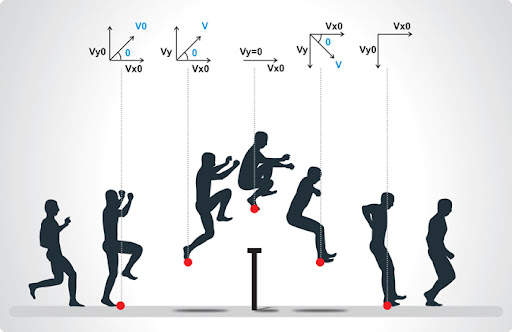


Por su parte ejemplo claro de un movimiento en 3 dimensiones es el gol efectuado por Roberto Carlos contra la selección Francesa, en esta anotación se puede observar como la bola se mueve hacia adelante, hacia arriba y abajo y también hacia los lados, implicando así los ejes $x$,$y$ y $z$ en un solo movimiento

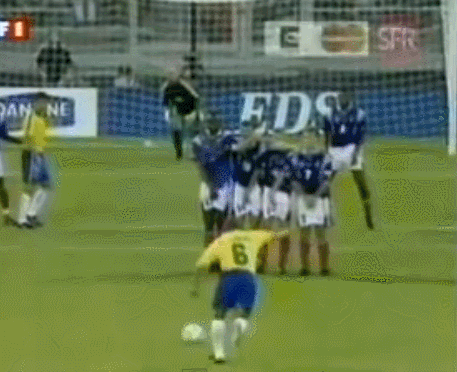


Al tratar un movimiento en varias dimensiones, se utilizarán las mismas ecuaciones del MRU y MRUA, las cuales son para el MRU:
$$
v = \dfrac{d}{t}
$$

Mientras que para el MRUA:
$$
x = x_0 + vt + \dfrac{1}{2}at^2
$$

$$
v = v_0 + at
$$

$$
v^2 = v_0^2 + 2a(x-x_0)
$$

Si se realiza el análisis de un movimiento en el que 2 ejes, $x$ y $y$, experimentan un movimiento con velocidades constantes y el otro eje, $z$, experimenta un movimiento acelerado, se puede definir el siguiente sistema de coordenadas:

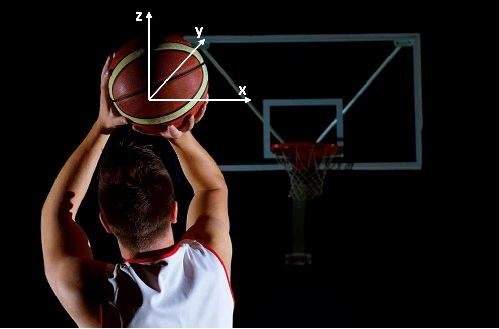

Dicho problema al estar ambientado en la Tierra, se establece que la aceleración siempre es constante a $-9.81 m/s^2$, por lo que al graficar la posición y la velocidad en las tres dimensiones, se obtiene:


In [30]:
Gráficas ()

Play(value=0, max=3)

Output()

Se puede observar que las posiciones en el eje $x$ y $y$ varían linealmente debido a la ausencia de una aceleración, a su vez se obtiene que la velocidad siempre va a ser constante para estos mismos ejes. Por otra parte, el eje z si presenta un movimiento parabólico, como se esperaría al lanzar una pelota y su velocidad si se ve alterada por la gravedad del planeta.

In [31]:
GraficaMovimiento ()

Play(value=0, max=3)

Dropdown(description='Vista:', options=(('Diagonal', 0), ('Eje X', 1), ('Eje Y', 2), ('Eje Z', 3)), value=0)

Output()

A su vez el movimiento parabólico puede ser analizado con base al ángulo en el que es lanzado un objeto. Si este análisis se realiza en dos dimensiones se obtiene un sistema como el mostrado en la siguiente imágen.


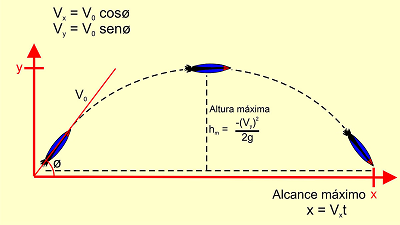

Graficando dicho movimiento, se obtiene:

In [60]:
GraficaParabólico ()

Play(value=0, max=10)

Output()